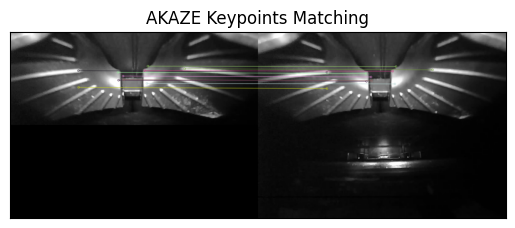

Kicker detected with match score: 27.81


In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def detect_kicker_akaze(image_path, template_path):
    # Load the input image and template
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    assert img is not None, "Image file could not be read, check path."

    template = cv.imread(template_path, cv.IMREAD_GRAYSCALE)
    assert template is not None, "Template file could not be read, check path."

    # Initialize AKAZE detector
    akaze = cv.AKAZE_create()
    
    # Detect keypoints and descriptors in both images
    keypoints_img, descriptors_img = akaze.detectAndCompute(img, None)
    keypoints_template, descriptors_template = akaze.detectAndCompute(template, None)

    # Check if descriptors are detected
    if descriptors_img is None or descriptors_template is None:
        print("No descriptors detected in one of the images.")
        return

    # Create a BFMatcher object to match descriptors
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

    # Match descriptors between the image and the template
    matches = bf.match(descriptors_template, descriptors_img)
    
    # Sort matches based on distance (lower distance is better)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw the matches on the image
    matched_img = cv.drawMatches(template, keypoints_template, img, keypoints_img, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Show the matched keypoints
    plt.imshow(matched_img)
    plt.title('AKAZE Keypoints Matching'), plt.xticks([]), plt.yticks([])
    plt.show()

    # Calculate match score based on the average distance
    match_distances = [m.distance for m in matches]
    match_score = np.mean(match_distances)
    
    # Threshold for detecting the kicker (you can fine-tune this value)
    if match_score < 70:  # Lower score means better match
        print(f"Kicker detected with match score: {match_score:.2f}")
    else:
        print(f"No kicker detected (match score: {match_score:.2f})")

# Test the function
image_path = 'image collection/CV Image Collection/03 Kicker Detection/800x600/Kicker at front position/Trial 3.jpg'
template_path = 'template image/template.jpg'

detect_kicker_akaze(image_path, template_path)

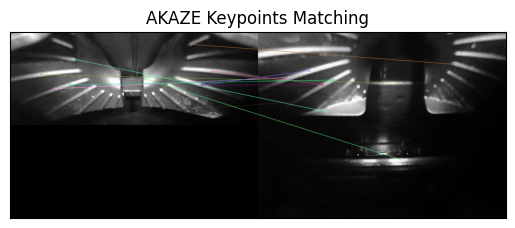

No kicker detected (match score: 96.40)


In [12]:
image_path = 'image collection/CV Image Collection/03 Kicker Detection/800x600/Invalid Case/Kicker in reverse orientation/Trial 1.jpg'
template_path = 'template image/template.jpg'

detect_kicker_akaze(image_path, template_path)

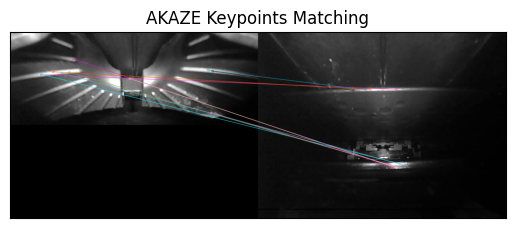

No kicker detected (match score: 105.80)


In [15]:
image_path = 'image collection/CV Image Collection/03 Kicker Detection/800x600/Kicker at pos 100/Trial 3.jpg'
template_path = 'template image/template.jpg'

detect_kicker_akaze(image_path, template_path)